# Diagramas de Bode

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está <b>INCOMPLETO</b> y puede estar incompleto y/o sufrir modificaciones</font>

Material faltante en este capítulo:
- Como interpretar un diagrama de Bode en sistemas de fase no mínima
- Diagrama de Bode para un polo o cero complejo
- Diagrama de Bode en Simulink
- Sintonización basada en diagrama de Bode en Simulink

___

<nav style="display: flex; justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_07"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_09"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600 -h 800

In [2]:
format compact;

# Fase Mínima y Fase no Mínima

Un sistema es de face mínima si y sólo si todos sus **polos** y **ceros en lazo abierto** están a la izquierda del eje imaginario. Esto **no debe confundirse** con la **estabilidad del sistema** ya que la estabilidad del sistema está dada únicamente por los **polos** y no por los ceros.

A continuación se muestran algunos ejemplos para diferenciar entre Fase Mínima (FM) y Fase no Mínima (FnM). Todos los ejemplos son con funciones de transferencia en lazo abierto.

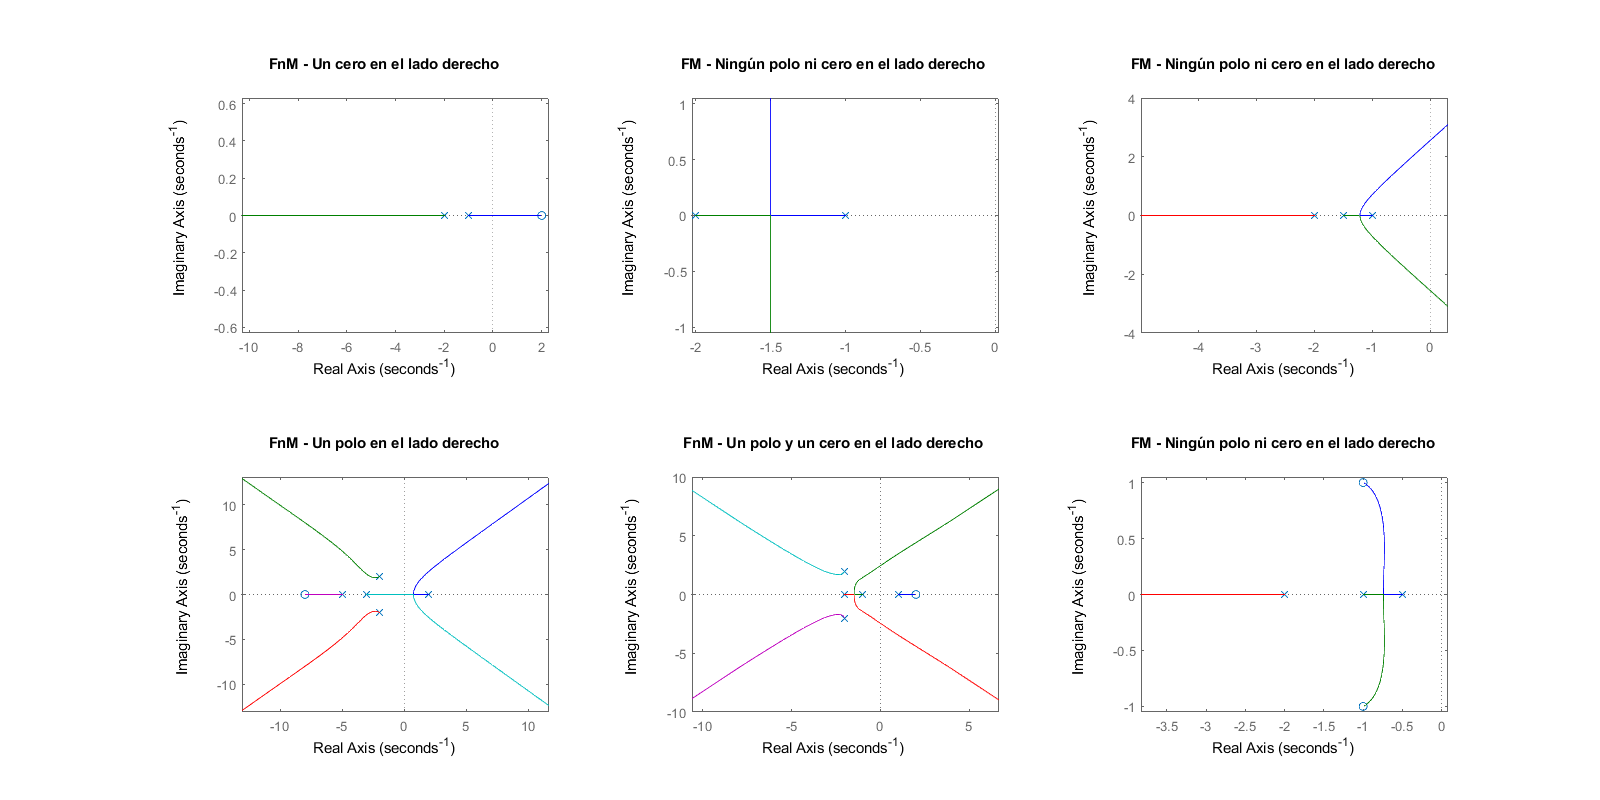

In [4]:
figure;

subplot(2, 3, 1)
sistema = zpk(2, [-1 -2], 1);
rlocus(sistema)
title("FnM - Un cero en el lado derecho")

subplot(2, 3, 2)
sistema = zpk([], [-1 -2], 1);
rlocus(sistema)
title("FM - Ningún polo ni cero en el lado derecho")

subplot(2, 3, 3)
sistema = zpk([], [-1 -2 -1.5], 1);
rlocus(sistema)
title("FM - Ningún polo ni cero en el lado derecho")

subplot(2, 3, 4)
sistema = zpk(-8, [2 -5 -3 -2+2j -2-2j], 1);
rlocus(sistema)
title("FnM - Un polo en el lado derecho")

subplot(2, 3, 5)
sistema = zpk(2, [1 -1 -2 -2+2j -2-2j], 1);
rlocus(sistema)
title("FnM - Un polo y un cero en el lado derecho")

subplot(2, 3, 6)
sistema = zpk([-1+1i; -1-1i], [-1 -2 -0.5], 1);
rlocus(sistema)
title("FM - Ningún polo ni cero en el lado derecho")


# Diagrama de Bode

El diagrama de Bode sólo se puede aplicar en sistemas de fase mínima

Es importante recordar que en el caso de sistemas SISO LTI, al someter a un sistema a una entrada senoidal, la salida en estado estable será también una señal senoidal con la **misma frecuencia**, sin embargo puede haber un **cambio de amplitud** y/o un **cambio de fase**.

Para construir un diagrama o traza de Bode se deben seguir los siguientes pasos:

1. Someter el sistema a una entrada senoidal con una determinada frecuencia $\omega$ y una amplitud $A$y esperar a llegar al **estado estable**
1. Variar $\omega$ desde $0$ hasta $+\infty$ 
1. Generar un gráfico que muestre la relación entre la amplitud de salida $A^{\prime }$ y la de entrada $A$ para cada valor de $\omega$, este gráfico es el gráfico de **Magnitud-Frecuencia**. En este gráfico la amplificación o atenuación de la amplitud se suele expresar en $dB$
1. Generar un gráfico que muestre la relación entre la la fase de entrada $0º$ y la de salida, este gráfico es el gráfico de **Fase-Frecuencia.**
1. Un detalle en la construcción es que tanto la **Magnitud** como la **Frecuencia** se encuentran en **escala logarítmica**, la magnitud por estar expresada en $dB$ y la frecuencia para poder cubrir un amplio espectro de posibilidades.

## Desarrollo matemático

Al utilizar la transformada de Laplace, la variable a utilizar, $s$, es una variable compleja, es decir:

$$s=\sigma +\omega i~~\sigma ,\omega \in \mathbb{R}$$

Pero, como el diagrama de Bode considera el sistema en **estado estable**, $\sigma$ puede considerarse nula, ya que en toda solución **estable** de sistemas LTI SISO se cumple

$$\lim_{s\to \infty } \sigma =0$$ 

Es por ello que al analizar una función de transferencia, si sólo se considera el estado estable se tiene que:

$$G(s)=G(\sigma +\omega i)\Rightarrow G(s)=G(\omega i)$$

Utilizando esta forma se procede a calcular tanto la **magnitud** como la **fase**

## Entrada

Dada una entrada senoida 

$$u(t)=A\cdot sen(\omega t)$$

Por las propiedades del sistema LTI, la salida va a ser de la forma

$$y(t)=B\cdot sen(\omega t+\phi )$$


Al aplicar la transformada de Laplace se tiene una entrada $U(s)$

$$U(s)=\frac{A\cdot \omega }{s^2 +\omega^2 }$$

Y al transformar la salida se tiene una salida $Y(s)$

$$Y(s)=\frac{B\cdot (\omega \cdot cos(\phi )+s\cdot sin(\phi ))}{s^2 +\omega^2 }$$


Para demostrar esto se debe partir de una función de salida expresada en función de la entrada por una función de transferencia

$$Y(s)=G(s)\cdot U(s)$$

Si se expresa $G(s)$ de manera genérica y $U(s)$ como está arriba se tiene

$$\begin{array}{ccl}
Y(s) & = & k\cdot \frac{(s+z_1 )(s+z_2 )...(s+z_m )}{(s+p_1 )(s+p_2 )...(s+p_n )}\cdot \frac{A\cdot \omega }{s^2 +\omega^2 }
\end{array}$$

Al hacer descomposición en fracciones parciales se tiene

$$Y(s)=\frac{C_1 }{s+p_1 }+\frac{C_2 }{s+p_2 }+...+\frac{C_n }{s+p_n }+\frac{C_e }{s+i\omega }+\frac{C_f }{s-i\omega }$$

Luego al aplicar la antitransformada se tiene

$$y(t)=C_1 \cdot e^{-p_1 t} +C_2 \cdot e^{-p_2 t} +...+C_n \cdot e^{-p_n t} +C_e \cdot e^{-i\omega t} +C_f \cdot e^{i\omega t}$$

Sin embargo, al evaluar únicamente el estado estacionario, se puede asumir que el valor de t es suficientemente o tiende asintóticamente a $\infty$. Quedando de esta forma:

$$\begin{array}{cclll}
\lim_{t\to \infty } y(t) & = & B\cdot sin(\omega t+\phi ) &  & 
\end{array}$$

Se llega entonces a que la respuesta en el tiempo una vez **alcanzado el estado estacionario** tendrá la forma 

$$y(t)=B\cdot sin(\omega t+\phi )$$

Ahora sólo resta determinar el valor de $B$ y de $\phi$, que son los parámetros que definen a la salida del sistema. Donde $\phi$ es el ángulo de entre el eje real y el punto en el plano complejo $Y(s)$y se lo conoce como **fase**, mientras que $B$ es la amplitud de la salida y se calcula de la siguiente forma

$$B=A\cdot |G(i\omega )|$$

Donde $|G(i\omega )|$ es la **magnitud** y $A$ es la amplitud de la entrada. Lo que interesa en realidad no es el valor exacto de $B$, sino la **relación de amplitudes** es decir, cuanto la amplitud de salida fue amplificada o atenuada. Esta relación de amplitud es el cociente entre la amplitud de salida y la de entrada, es decir:

$$\frac{B}{A}=\frac{A\cdot |G(i\omega )|}{A}=|G(i\omega )|$$

Por lo tanto la **magnitud** de la función de transferencia refleja cual es la **relación entre la amplitud de entrada** y la de salida

A continuación se muestra como calcular ambas cantidades.

### Magnitud

Como la función $G(i\omega )$puede expresarse como un cociente de polinomios se tiene:

$$Magnitud(G)=|G(i\omega )|=\Bigl|\;k\cdot \frac{(i\omega +z_1 )(i\omega +z_2 )...(i\omega +z_m )}{(i\omega +p_1 )(i\omega +p_2 )...(i\omega +p_n )}\Bigr|$$

Aplicando propiedades de los módulos, se obtiene

$$Magnitud(G)=k\cdot \frac{|(i\omega +z_1 )(i\omega +z_2 )...(i\omega +z_m )|}{|(i\omega +p_1 )(i\omega +p_2 )...(i\omega +p_n )|}$$

Para calculos los módulos del numerador y del denominador, se usa la representación **rectangular** de los números complejos, en esta forma, se define a la magnitud como la distancia euclideana en el plano complejo del origen al punto asociado a un $\omega$ específico. Esta distancia puede calcularse por teorema de pitágoras como:

$$Magnitud(G)=\sqrt{real^2 +imaginario^2 }$$

Esto quiere decir que el primer paso es trabajar algebraicamente el numerador y el denominador para llevarlos a la forma binómica, para ello todos los términos con la unidad imaginaria $i$ deben agruparse y luego podrá expresarse la magnitud como

$$Magnitud(G)=k\cdot \frac{\sqrt{real\_numerador^2 +imaginario\_numerador^2 }}{\sqrt{real\_denominador^2 +imaginario\_denominador^2 }}$$

Adicionalmente, la magnitud suele expresar en **decibelios** que es una unidad **logarítmica** definida de la siguiente forma

$$Magnitud_{dB} (G)=20\log_{10} \Big(\frac{B}{A}\Big)=20\log_{10} \Big(\frac{A\cdot |G(i\omega )|}{A}\Big)=20\log_{10} (|G(i\omega )|)$$

De ahora en más, como siempre se usará la magnitud expresada en decibelios, **se omite el súbindice** $dB$**.

## Fase

En el caso de la fase, no hay una fórmual que pueda expresarse en función del numerador y el denominador sino que se tiene que llevar a expresión a la forma binómica y utilizar la tangente de la representación rectangular para hallar el ángulo $\phi$. Es decir

$$\begin{array}{rll}
Fase(G)=~\phi  & = & \tan^{-1} \Bigl(\frac{imaginario}{real}\Bigr)
\end{array}$$

# Construcción del diagrama de Bode

## Construcción aditiva

Una de las ventajas del diagrama de Bode es que su construcción es aditiva, es decir, el diagrama asociado a una función de transferencia es igual a la suma de los diagramas de sus **ceros y polos**.

Esto puede demostrarse de la siguiente forma

$$\begin{array}{cllr}
G(i\omega ) & = & k\cdot (i\omega +z_1 )\cdot (i\omega +z_2 )~...~(i\omega +z_m )\cdot \frac{1}{(i\omega +p_1 )}\cdot \frac{1}{(i\omega +p_2 )}~...~\frac{1}{(i\omega +p_n )}
\end{array}$$

Entonces al calcular la **magnitud**

$$\begin{array}{ccl}
Magnitud(G) & = & 20\cdot \Big\lbrack \log_{10} (|k|)+\log_{10} (|i\omega +z_1 |)+\log_{10} (|i\omega +z_2 |)+...+\log_{10} (|i\omega +z_m |)-\log_{10} (|i\omega +p_1 |)-\log_{10} (|i\omega +p_2 |)-...-\log_{10} (|i\omega +p_n |)\Big\rbrack 
\end{array}$$

Para la **Fase** el proceso es similar y se basa en el **teorema del argumento del producto de números complejos**. La desmostración es un poco más extensa así que se deja \href{https://proofwiki.org/wiki/Argument_of_Product_equals_Sum_of_Arguments}{un recurso} donde se detalla paso a paso para el lector interesado. La conclusión del teorema es

$$Fase(G)=\phi =Fase(G(i\omega ))=Fase(k)+Fase(i\omega +z_1 )+Fase(i\omega +z_2 )+...+Fase(i\omega +z_m )+Fase\Big(\frac{1}{i\omega +p_1 }\Big)+Fase\Big(\frac{1}{i\omega +p_2 }\Big)+...+Fase\Big(\frac{1}{i\omega +p_n }\Big)$$

En las expresiónes anteriores puede verse como en lugar de calcular la magnitud y la fase para una función de transferencia $G(i\omega )$ genérica, se pueden sumar los componentes representados por sus **polos**, **ceros** y la **ganancia**.

A continuación se muestran los bloques fundamentales que permiten graficar cualquier función de transferencia usando el método aditivo. Para ello hace falta conocer cúal es la magnitud y fase de:

- Una Ganancia
- Un Polo/Cero en el Origen
- Un Polo/Cero Real
- Un Polo/Cero Complejo

Conociendo como se esboza un diagrama de Bode para todos estos casos, se puede graficar cualquier función de transferencia.

## Sistema Constante

Un sistema constante es aquel definido por

$$G(s)=K~~K\in \mathbb{R}$$

Esta constante es normalmente llamada ganancia y el diagrama de bloques equivalente es


<center><img src="images/bode/image_00.png"></center>

### Definiendo el sistema

Se definen dos sistemas, uno con ganancia positiva $K=10$ y otro con ganancia negativa $K=-10$. También se explicita el rango de frecuencias a utilizar

In [5]:
sistemas = {};
sistemas{1} = zpk([], [], 10);
sistemas{2} = zpk([], [], -10);

frecuencia = logspace(-1, 3, 1000);

### Magnitud

Utilizando las fórmulas de la introducción se tiene entonces:

$$Magnitud(G)=20\cdot \log_{10} (|G(i\omega )|)=20\cdot \log_{10} (|K|)$$

Como la magnitud no tiene ningún $\omega$, el valor de la magnitud será constante para todo el espectro de frecuencias.

Concretamente, para los valores de $k\in \lbrace -10,10\rbrace$, el valor de la magnitud será de $20dB$

**En este caso ambas gráficas se ven superpuestas en el mismo valor**

In [6]:
%plot inline --format=png -w 1600 -h 500

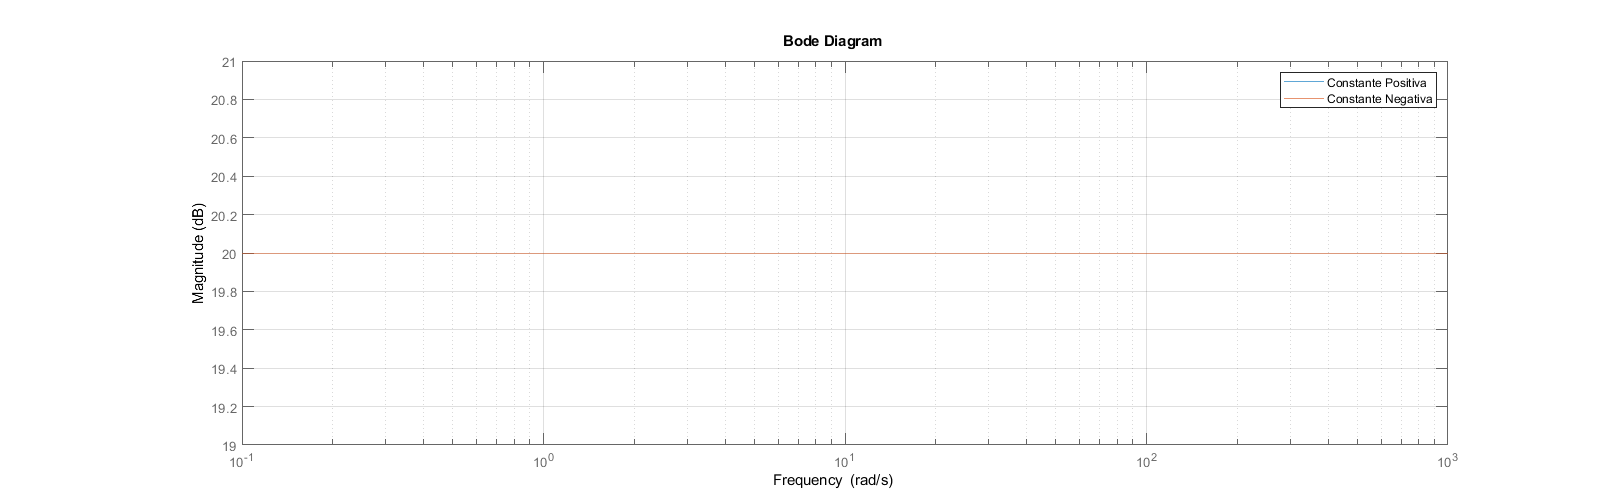

In [7]:
figure;
hold all

bodemag(sistemas{:}, frecuencia)

legend("Constante Positiva", "Constante Negativa")
grid on

### Fase

Para el cálculo de la fase se tiene

$$Fase(G)=~\phi =\tan^{-1} \Bigl(\frac{imaginario}{real}\Bigr)$$

Entonces:

$$\tan^{-1} \Bigl(\,\frac{0}{K}\,\Bigr)=\left\lbrace \begin{array}{cc}
\pi  & ~~\textrm{if}\;K<0
\end{array}\right.$$

Esto quiere decir que la fase será constante y que podrá tener un valor de $0º$ o de $180ª$ ($\pi$ radiantes). Entonces la fase depende de manera exclusiva del **signo} de $K$ y no de su valor absoluto.

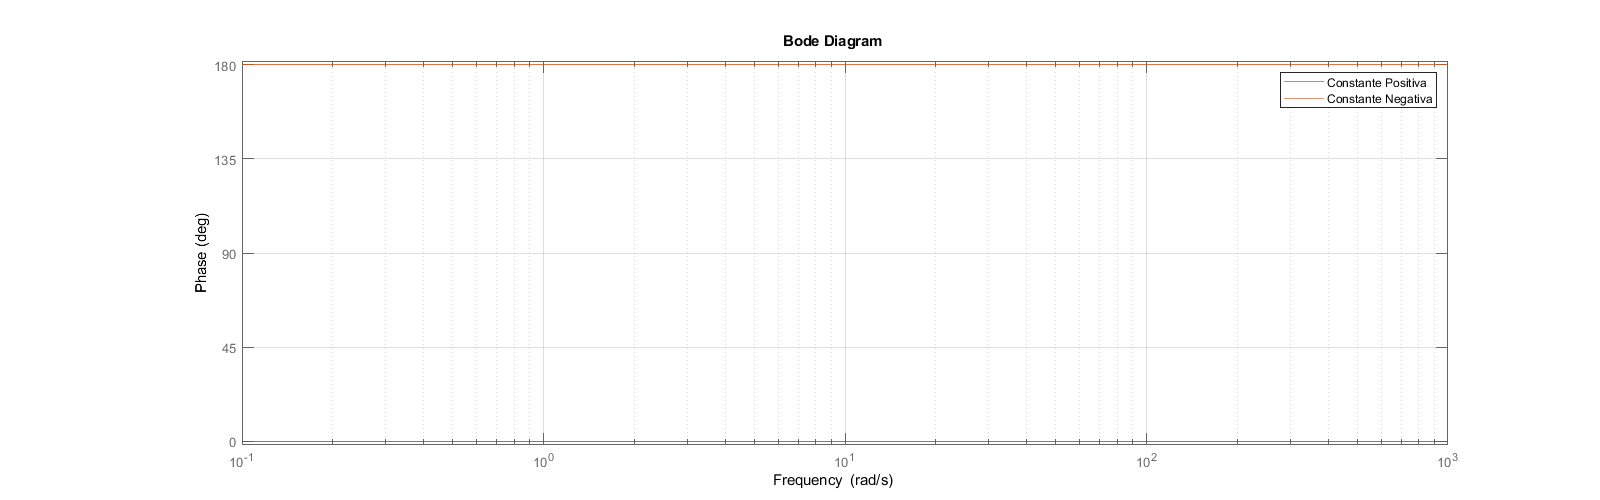

In [8]:
figure;
hold all

h = bodeplot(sistemas{:}, frecuencia);
setoptions(h, 'MagVisible', 'off');

legend("Constante Positiva", "Constante Negativa")
grid on

## Sistema con un Polo o un Cero en el origen

Un sistema con un polo en el origen puede describirse como

$$G(s)=\frac{1}{s}$$

Si se reemplaza $s$ con $i\omega$ se tiene entonces:

$$G(i\omega )=\frac{1}{i\omega }=\frac{1}{i\omega }\cdot \frac{i}{i}=\frac{i}{-\omega }=-\frac{1}{\omega }i$$

La representación en diagrama de bloques es


<center><img src="images/bode/image_01.png"></center>

### Cero en el origen

Una función de transferencia con un cero en el origen está definida como

$$H(s)=s$$

La representación en diagrama de bloques es


<center><img src="images/bode/image_02.png"></center>


Sin embargo, herramientas como Simulink **no permiten crear funciones de transferencia impropias**, por lo que se suele utilizar la siguiente representación alternativa con el bloque **derivador o diferenciador**


<center><img src="images/bode/image_03.png"></center>

### Definiendo el sistema

Se definen dos sistemas, uno con un cero en el origen y otro con un polo en el origen. También se explicita el rango de frecuencias a utilizar

In [9]:
sistemas = {};
sistemas{1} = zpk([], [0], 1);
sistemas{2} = zpk([0], [], 1);

frecuencia = logspace(-1, 3, 1000);

### Magnitud

La magnitud está definida por:

$$Magnitud(G)=20\cdot \log_{10} (|G(i\omega )|)=20\cdot \log_{10} (|-\frac{1}{\omega }i|)=20\cdot \log_{10} (\frac{|-1|}{|\omega |})=20\cdot \log_{10} (\frac{1}{\omega })=20\cdot \log_{10} (\omega^{-1} )=-20\cdot \log_{10} (\omega )$$

Al utilizar la escala logarítmica la expresión anterior representa una recta que pasa por el punto $(1,0)$ y que tiene una **pendiente negativa }de $-20dB$

**Cero en el origen**

En el caso del cero en el origen se tiene:

$$H(s)=s=\frac{1}{1/s}$$

Por propiedad de los logaritmos se puede expresar como

$$Magnitud(\frac{1}{1/s})=Magnitud(1)-Magnitud(\frac{1}{s})$$

Entonces la magnitud de un cero en el origen puede expresarse como la magnitud de una constante igual a $1$ menos la magnitud de un polo, entonces:

$$\begin{array}{ccccc}
Magnitud(H) & = & 20\cdot \log_{10} (\omega ) &  & 
\end{array}$$

Se tiene entonces que la magnitud en frecuencia de un cero en el origen es una recta simétrica con respecto al valor $0dB$, siendo una recta con una **pendiente positiva** igual a **20db** que pasa por el punto $(1,0)$


figure;
hold all
bodemag(sistemas{:}, frecuencia)

legend("Polo en el origen", "Cero en el origen")
grid on


### Fase

Para el cálculo de la **fase** se tiene

$$\phi =\tan^{-1} \Bigl(\frac{imaginario}{real}\Bigr)=\tan^{-1} \Bigl(-\frac{1/\omega }{0}\Bigr)=-90$$

Por lo tanto la fase será $-90º$ para todo valor de $\omega$

**Cero en el origen**

Un análisis análogo al de la magnitud puede hacerse para la fase

$$\begin{array}{ccccc}
Fase(H) & = & 90 &  & 
\end{array}$$

Se concluye entonces que la fase para un sistema con un cero en el origen es de $90º$

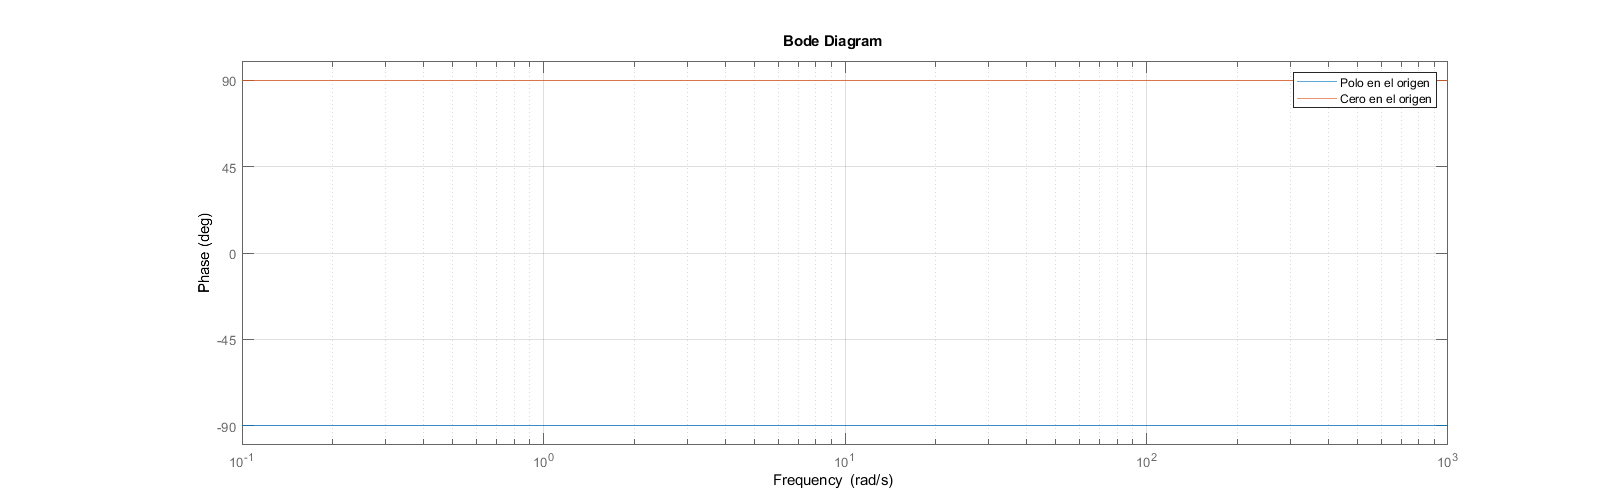

In [10]:
figure;
hold all

h = bodeplot(sistemas{:}, frecuencia);
setoptions(h, 'MagVisible', 'off');

ylim([-100 100])
legend("Polo en el origen", "Cero en el origen")
grid on

### Interpretación de la simetría entre Cero y Polo en el origen

La sección anteior mostró como un cero tiene una representación simétrica a un polo, esto puede ilustrarse analíticamente ya que un sistema con un polo y un cero en el origen está definida por

$$W(s)=\frac{s}{s}=1$$

Esto quiere decir que 

$$\begin{array}{rclll}
 &  & Magnitud(s)=-Magnitud\left(\frac{1}{s}\right) &  & 
\end{array}$$

Análogamente la misma demostración puede aplicarse a la fase quedando

$$Fase(s)=-Fase(\frac{1}{s})$$

## Sistema con un Polo o un Cero Real

Un sistema con un polo real está definido por

$$G(s)=\frac{1}{s+p}~~p\in {\mathbb{R}}^-$$

Su representación como diagrama de bloques es:


<center><img src="images/bode/image_04.png"></center>


Sin embargo, para facilitar el proceso de graficación se expresará el sistema usando una parametrización alternativa

$$G(s)=\frac{1}{s+p}=\frac{1}{\frac{s}{\omega_0 }+1}~~\omega_o \in {\mathbb{R}}^+$$

En esta parametrización, $\omega_0$ es la **frecuencia de corte**.

Luego, utilizando la parametrización de $G(i\omega )$se tiene

$$G(i\omega )~=~\frac{1}{\frac{\omega }{\omega_0 }i+1}~=~\frac{1}{\frac{\omega }{\omega_0 }i+1}\cdot \frac{1-\frac{\omega }{\omega_0 }i}{1-\frac{\omega }{\omega_0 }i}~=~\frac{1-\frac{\omega }{\omega_0 }i}{1+\frac{\omega^2 }{\omega_0^2 }}~=~\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}-\frac{\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}i$$


Quedando entonces


$$real=\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}~~~~~imaginario=-\frac{\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}i$$ 

### Definiendo el sistema

Se definen dos sistemas, uno con una frecuencia de corte de 1 radian y otro con una frecuencia de corte de 10 radianes. También se explicita el rango de frecuencias a utilizar

In [11]:
s = tf("s");

sistemas = {};
sistemas{1} = 1 / (1+s/1);
sistemas{2} = 1 / (1+s/10);

frecuencia = logspace(-1, 3, 1000);

### Magnitud

Utilizando la expresión

$$|G(i\omega )|=\sqrt{real^2 +imaginario^2 }$$

Se tiene entonces

$$|G(i\omega )|=\sqrt{~{\left(\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}~\right)}^2 +~{\left(\frac{-\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}~\right)}^2 }=\sqrt{\frac{1+{\left(\frac{\omega }{\omega_0 }\right)}^2 }{{\left(1+{\left(\frac{\omega }{\omega_0 }\right)}^2 \right)}^2 }}=\sqrt{\frac{1}{1+{\left(\frac{\omega }{\omega_0 }\right)}^2 }}=\sqrt{\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}}={\left(\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}\right)}^{\frac{1}{2}}$$

Una vez en esta forma se puede calcular la magnitud como

$$Magnitud(G)=20\cdot \log_{10} \left({\left(\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}\right)}^{\frac{1}{2}} \right)=10\cdot \log_{10} \left(\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}\right)=-10\cdot \log_{10} \left(1+\frac{\omega^2 }{\omega_0^2 }\right)$$

El valor de la magnitud queda entonces definido por una función que puede **aproximarse** evaluando los puntos críticos de $\omega$

$$Magnitud(G)=\left\lbrace \begin{array}{ccccc}
-20\log_{10} (\omega /\omega_0 ) &  &  & ~~\textrm{si} & ~~\omega >>\omega_0 
\end{array}\right.$$

Entonces, la función aproximada puede representarse de la siguiente manera: cuando $\omega$ es mucho menor que la **frecuencia de corte** entonces la magnitud es nula, a medida que $\omega$ se acerca a la frecuencia de corte, la magnitud baja hasta llegar a $-3dB$ y a partir de ese momento sigue una línea recta con una **pendiente negativa** de $20dB$, esa recta es la que pasa por el punto $(\omega_0 ,0)$

La magnitud para un polo real tiene tres puntos críticos, el primero es el valor inicial que será 

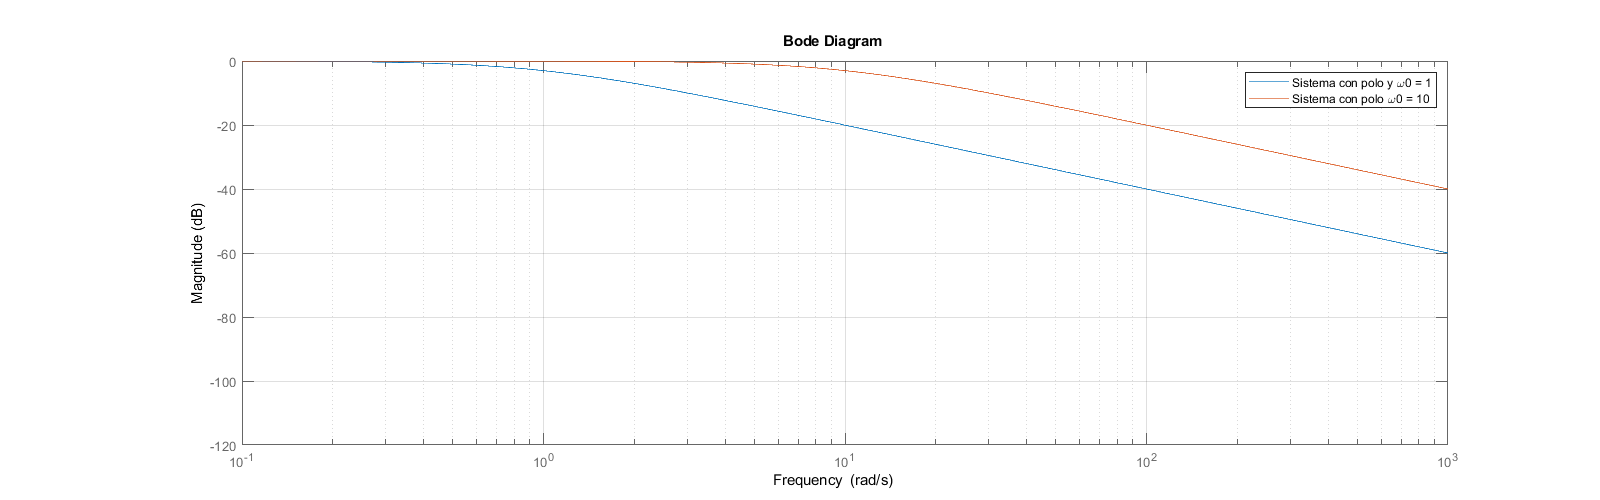

In [12]:
figure;
hold all

bodemag(sistemas{:}, frecuencia)

legend("Sistema con polo y \omega0 = 1", "Sistema con polo \omega0 = 10")
ylim([-120 0])
grid on

### Fase

Utilizando la expresión 

$$Fase(G)=~\phi =\tan^{-1} \Bigl(\frac{imaginario}{real}\Bigr)$$

Se tiene que la fase es

$$Fase(G)~=~\phi ~=~\tan^{-1} \left(\frac{\left(\frac{-\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}\right)}{\left(\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}\right)}\right)~=~\tan^{-1} \left(\frac{-\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}\cdot \frac{1}{\frac{1}{1+\frac{\omega^2 }{\omega_0^2 }}}\right)~=~\tan^{-1} \left(\frac{-\frac{\omega }{\omega_0 }}{1+\frac{\omega^2 }{\omega_0^2 }}\cdot \left(1+\frac{\omega^2 }{\omega_0^2 }\right)\right)~=~\tan^{-1} \left(-\frac{\omega }{\omega_0 }\right)$$

Nuevamente, la Fase entonces puede **aproximarse** viendo los valores críticos de $\omega$

$$Fase(G)=\left\lbrace \begin{array}{ccccc}
\tan^{-1} (-\infty ) & = & -\pi /2 & ~~\textrm{si} & ~~\omega >>\omega_0 
\end{array}\right.$$

De esta forma, cuando el valor de $\omega$ es mucho menor a la **frecuencia de corte** la fase de 0º, a medida que $\omega$ se acerca a la frecuencia de corte el valor se acerca a $-45º$ ( $-\pi /4$ radiantes) y cuando $\omega$ es mucho mayor que la frecuencia de corte, la fase se acerca asintóticamente a $-90º$ ( $-\pi /2$ radianes)

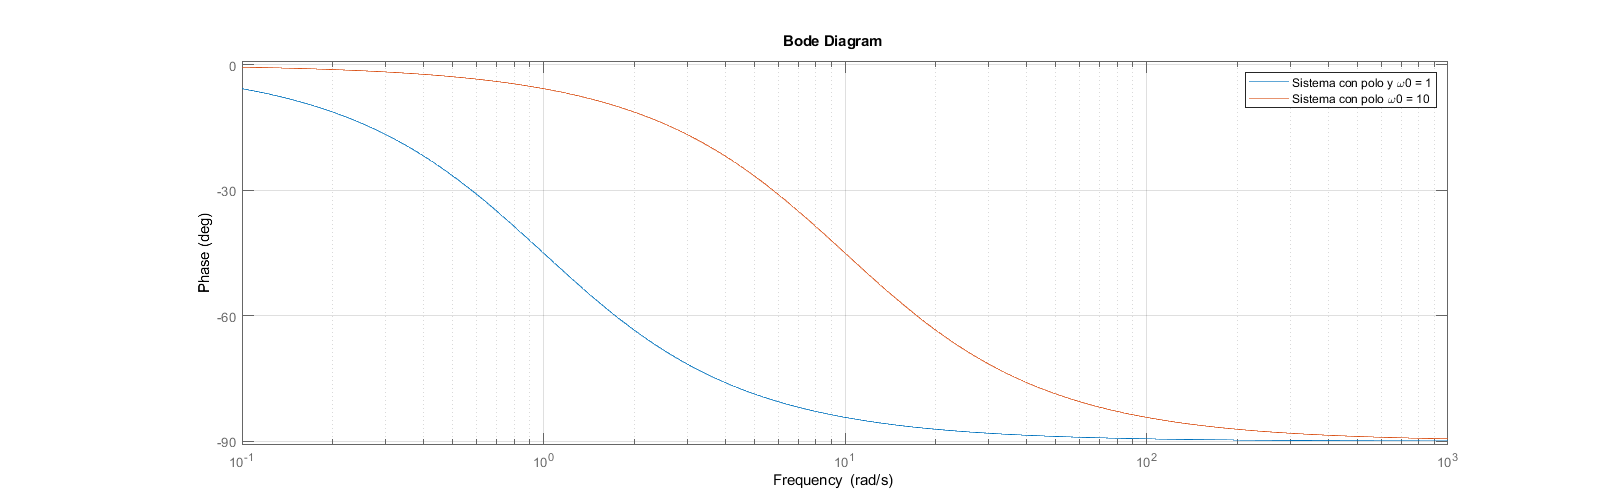

In [13]:
figure;
hold all

h = bodeplot(sistemas{:}, frecuencia);
setoptions(h, 'MagVisible', 'off');

legend("Sistema con polo y \omega0 = 1", "Sistema con polo \omega0 = 10")
grid on

### Cero Real

En el caso de un cero real, un análisis similar al de la simetría visto en la sección anterior pueden hacerse en este caso.

Si $H(s)$es una función con un cero real

$$H(s)=s+z=\frac{1}{1/(s+z)}$$

Se tiene que

$$W(s)=\frac{s+z}{s+z}=1$$

Entonces

$$\begin{array}{rclll}
 &  & Magnitud\left(s+z\right)=-Magnitud\left(\frac{1}{s+z}\right) &  & 
\end{array}$$

Análogamente la misma demostración puede aplicarse a la fase quedando

$$Fase\left(s+z\right)=-Fase\left(\frac{1}{s+z}\right)$$

Se concluye entonces que un sistema con un cero real tiene una representación en el dominio de la frecuencia simétrica a la de un sistema con un polo real.

### Definiendo el sistema

Se definen dos sistemas con la misma frecuencia de corte que los anteriores pero con ceros en vez polos. También se explicita el rango de frecuencias a utilizar

In [14]:
sistemas{3} = (1+s/1);
sistemas{4} = (1+s/10);

### Magnitud

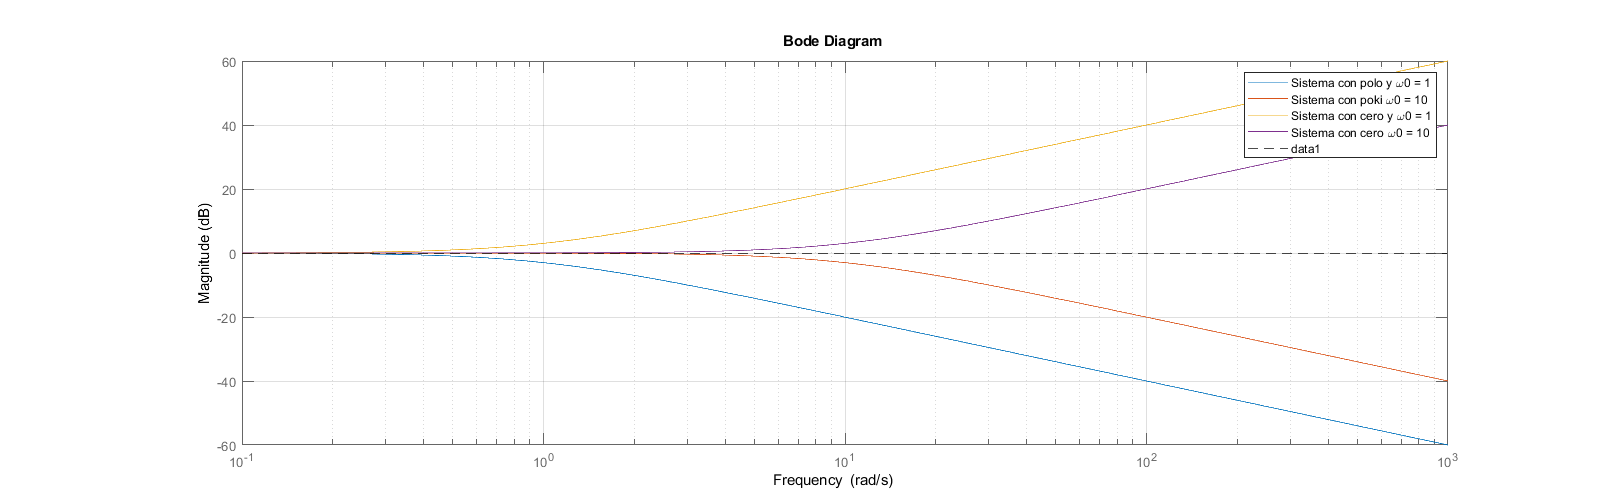

In [15]:
figure;
hold all

bodemag(sistemas{:}, frecuencia)

legend("Sistema con polo y \omega0 = 1", "Sistema con poki \omega0 = 10", "Sistema con cero y \omega0 = 1", "Sistema con cero \omega0 = 10")
ylim([-60 60])
yline(0, "--k")
grid on

### Fase

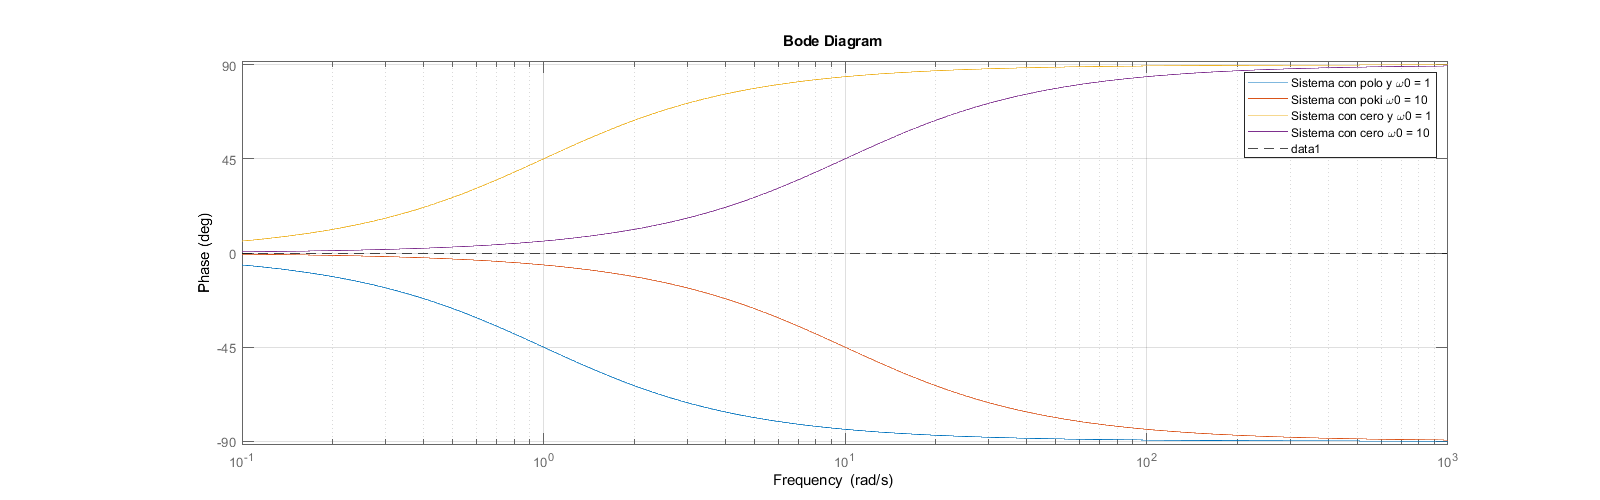

In [16]:
figure;
hold all

h = bodeplot(sistemas{:}, frecuencia);
setoptions(h, 'MagVisible', 'off');

legend("Sistema con polo y \omega0 = 1", "Sistema con poki \omega0 = 10", "Sistema con cero y \omega0 = 1", "Sistema con cero \omega0 = 10")
yline(0, "--k")
grid on

## Sistema con un Polo o un Cero Complejo

In [17]:
sistemas = {};
sistemas{1} = 1;
sistemas{2} = 1;
sistemas{3} = 1;

### Magnitud

In [18]:
%TODO

### Fase

In [19]:
%TODO

## Evaluando Estabilidad

Se puede evaluar estabilidad si para un desfase de 180 la amplitud de la salida es menor que 1. Como se utiliza la escala logarítmica esto equivale a decir que es menor a 0 dB

In [20]:
%plot inline --format=png -w 1600 -h 800

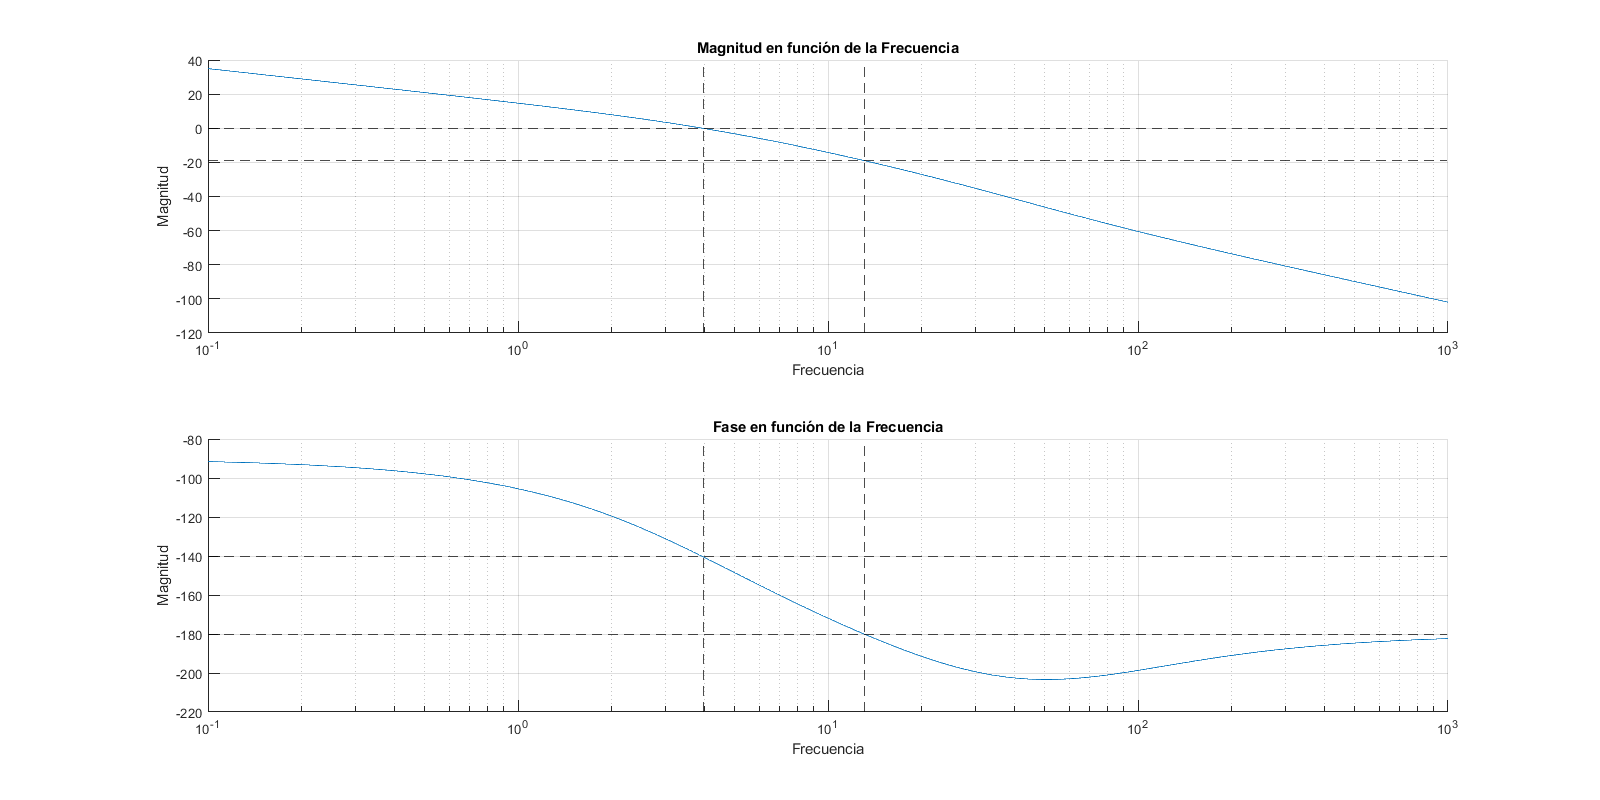

In [21]:
sistema = zpk([-70], [0 -4 -25], 8);

frecuencia = logspace(-1, 3, 1000);
[magnitud, fase, frecuencia] = bode(sistema, frecuencia);
magnitud = 20 * log10(magnitud);

[minimo, magnitud_indice_minimo] = min(abs(magnitud));
frecuencia_cruce_ganancia = frecuencia(magnitud_indice_minimo);

[minimo, fase_indice_minimo] = min(abs(fase+180));
frecuencia_cruce_fase = frecuencia(fase_indice_minimo);

margen_ganancia = 1 / -magnitud(fase_indice_minimo);
margen_fase = 180 + fase(magnitud_indice_minimo);

figure;
ax = subplot(2, 1, 1);
hold(ax, "on");
plot(frecuencia, reshape(magnitud, [1, length(frecuencia)]))
yline(0, "--k")
yline(magnitud(fase_indice_minimo), "--k")
xline(frecuencia_cruce_ganancia, "--k")
xline(frecuencia_cruce_fase, "--k")
set(gca, 'XScale', 'log')
xlabel("Frecuencia")
ylabel("Magnitud")
title("Magnitud en función de la Frecuencia")
grid("on")

ax = subplot(2, 1, 2);
hold(ax, "on");
plot(frecuencia, reshape(fase, [1, length(frecuencia)]))
xline(frecuencia_cruce_ganancia, "--k")
xline(frecuencia_cruce_fase, "--k")
yline(-180, "--k")
yline(fase(magnitud_indice_minimo), "--k")
set(gca, 'XScale', 'log')
xlabel("Frecuencia")
ylabel("Magnitud")
title("Fase en función de la Frecuencia")
grid("on")

## Criterio de Estabilidad

Un sistema es estable si cualquiera de las siguientes condiciones equivalentes se cumplen

1. El margen de ganancia y el margen de fase son ambos mayores a cero

In [22]:
margen_ganancia, margen_fase

margen_ganancia =
    0.0526
margen_fase =
   39.5326



**Calculando $K_p$ dado un margen de ganancia**

In [23]:
%TODO 

2. La frecuencia de **Cruce de Ganancia** es **menor** que la frecuencia de **Cruce de Fase**

In [24]:
frecuencia_cruce_ganancia, frecuencia_cruce_fase

frecuencia_cruce_ganancia =
    3.9591
frecuencia_cruce_fase =
   13.1256



3. Si la amplitud asociada a la frecuencia de **Cruce de Fase** (desfase de -180) es menor a 1 o análogamente menor a 0 dB

In [25]:
magnitud(fase_indice_minimo)

ans =
  -19.0127



## Forma automática de calcular márgenes

In [26]:
allmargin(sistema)

ans = 
  struct with fields:

     GainMargin: [8.8444 Inf]
    GMFrequency: [13.0685 Inf]
    PhaseMargin: 39.6681
    PMFrequency: 3.9435
    DelayMargin: 0.1756
    DMFrequency: 3.9435
         Stable: 1



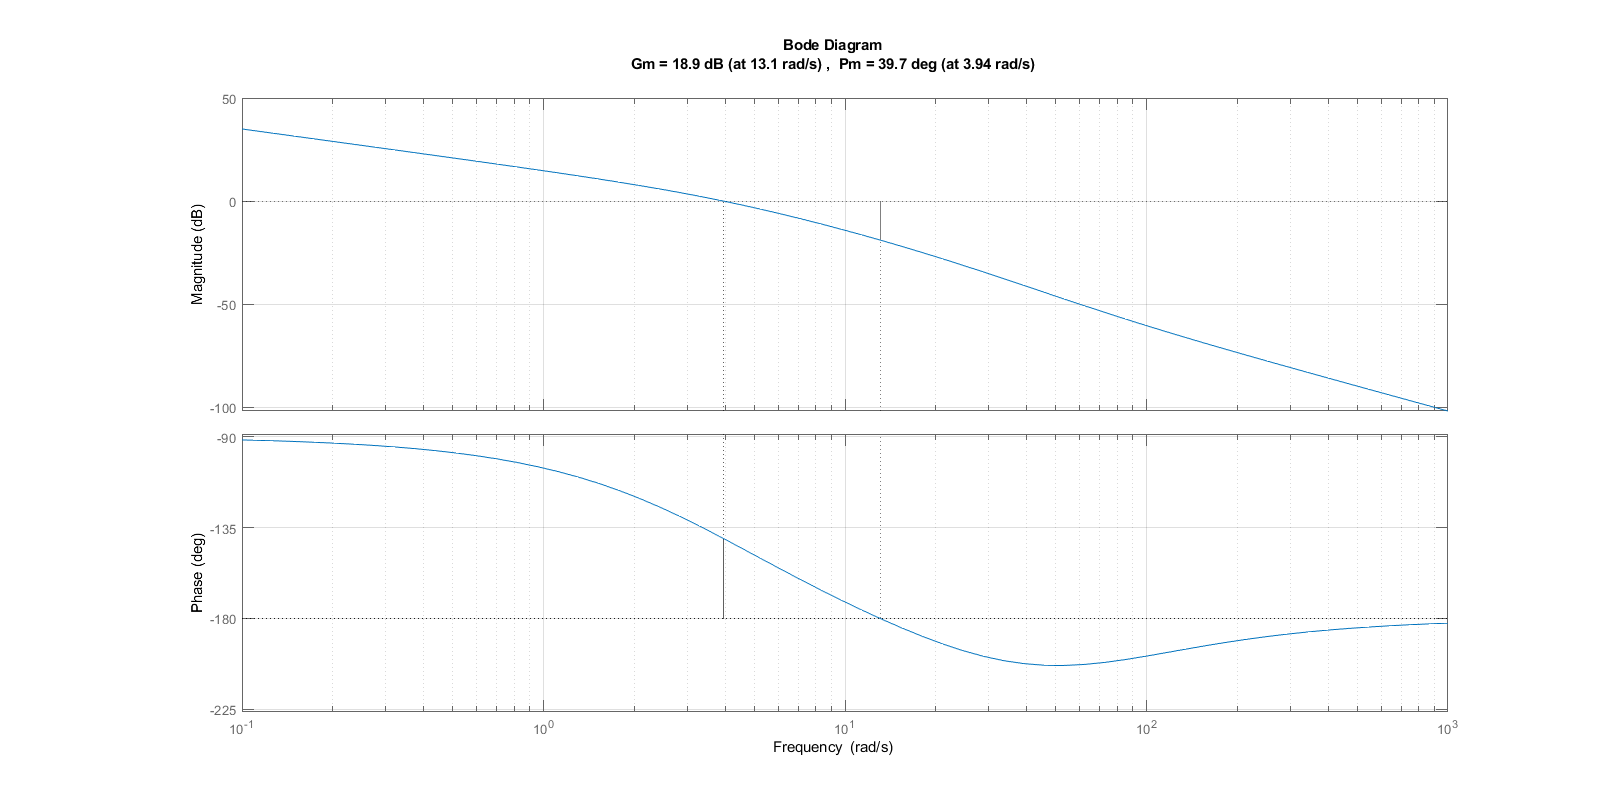

In [27]:
figure;
margin(sistema)
grid on

## Casos

Existen 4 casos al evaluar sistemas de fase mínima con los diagramas de Bode


1. **El sistema tiene un margen de ganancia infinito**: la magnitud se encuentra por debajo de la línea de los 0dB y se corresponde con sistemas que son estables para cualquier valor de $K$
1. **El sistema tiene un margen de ganancia finito y positivo**: la magnitud para la **frecuencia de cruce de fase** es negativa y se corresponde con un sistema que es estable **para el valor actual de $K$** pero no no será estable si se aumenta el $K$más allá del valor crítico.
1. **El sistema tiene un margen de ganancia nulo**: la magnitud es nula para la **frecuencia de cruce de fase** y se corresponde con un sistema críticamente estable.
1. **El sistema tiene un margen de ganancia finito y negativo**: la magnitud para la **frecuencia de cruce de fase** es positiva y se corresponde con un sistema que es inestable **para el valor actual de** $k$** pero que será estable si se aumenta el $K$ más allá del valor crítico. 


No existe la posibilidad que el sistema sea **inestable para todo $K$** con un diagrama de Bode ya que esos sistemas **no son de fase mínima**.

In [28]:
%plot inline --format=png -w 2600 -h 800

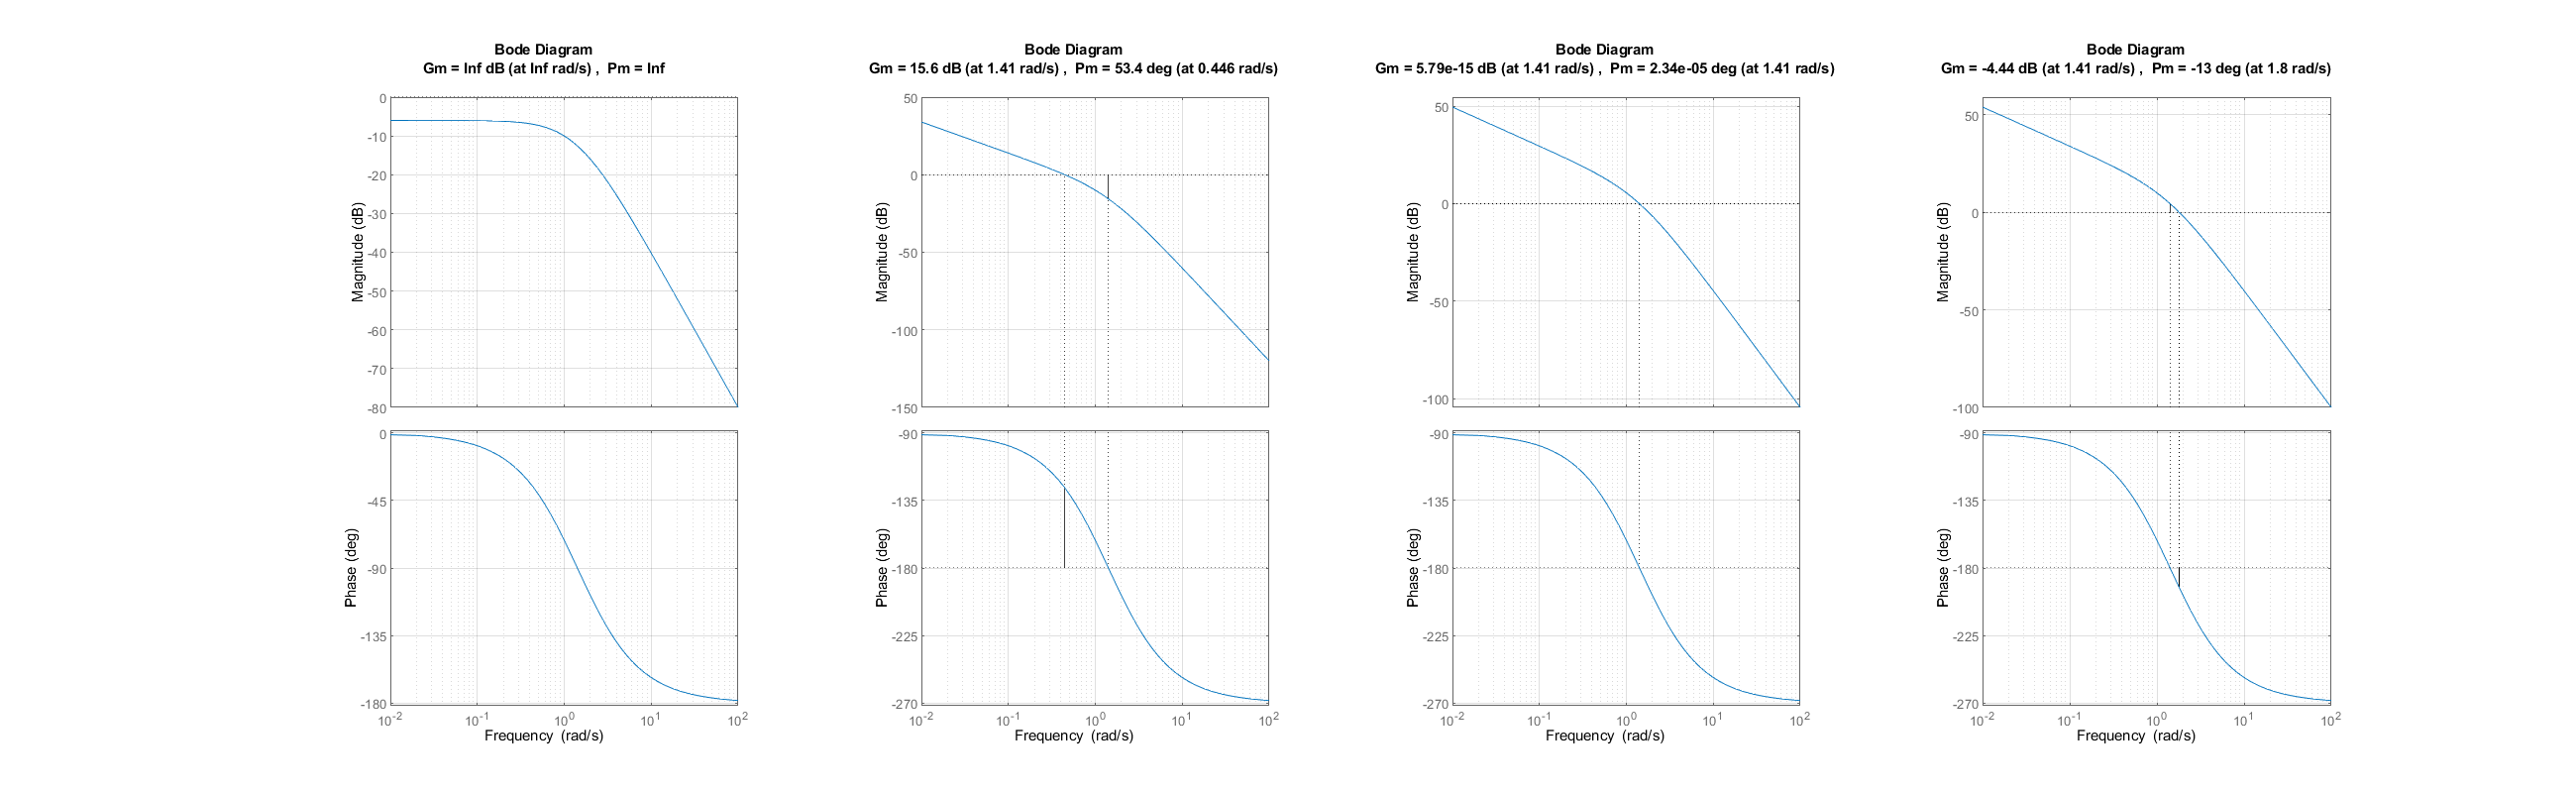

In [29]:
figure;

subplot(1, 4, 1)
[num, den] = zp2tf([], [-1 -2], 1);
sistema = tf(num, den);
margin(sistema)
grid on

subplot(1, 4, 2)
sistema = tf([1], [1 3 2 0]);
margin(sistema)
grid on

subplot(1, 4, 3)
sistema = tf([1], [1 3 2 0]);
margin(6*sistema)
grid on

subplot(1, 4, 4)
sistema = tf([1], [1 3 2 0]);
margin(10*sistema)
grid on

## Ancho de banda

In [30]:
%plot inline --format=png -w 1600 -h 500

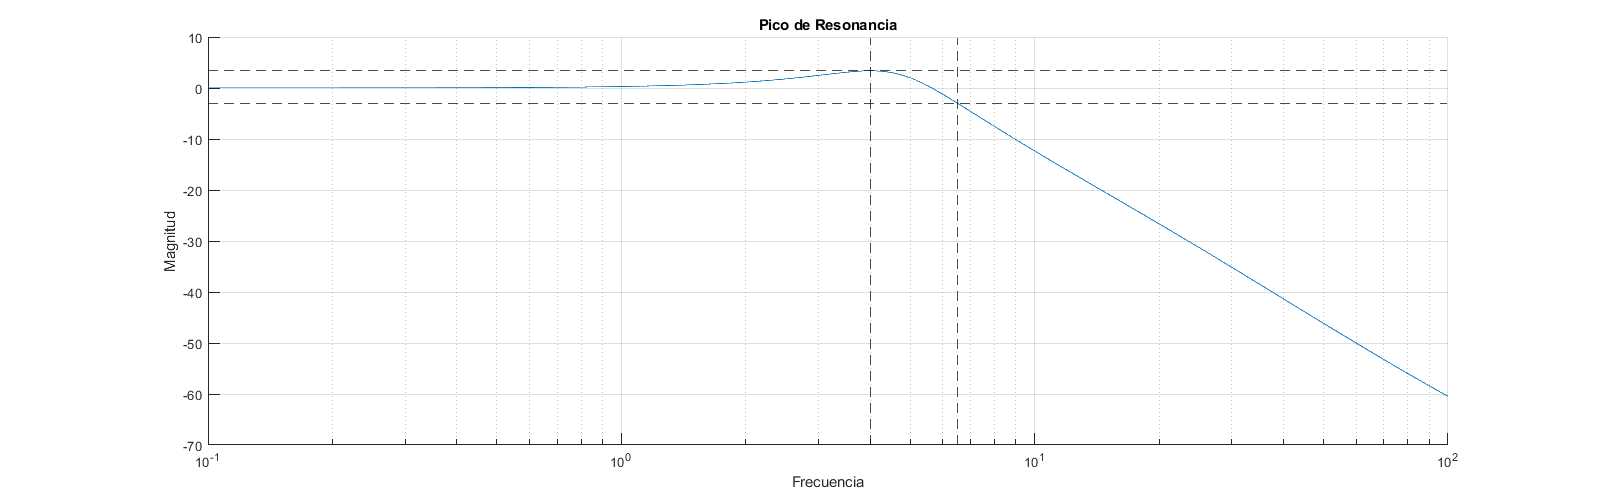

In [31]:
sistema = zpk([-70], [0 -4 -25], 8);

lazo_cerrado = feedback(sistema, 1);

frecuencia = logspace(-1, 2, 1000);
[magnitud, fase, frecuencia] = bode(lazo_cerrado, frecuencia);
magnitud = 20 * log10(magnitud);

[pico_de_resonancia, magnitud_indice_maximo] = max(magnitud);
frecuencia_pico_de_resonancia = frecuencia(magnitud_indice_maximo);

[magitud_ancho_de_banda, magitud_indice_ancho] = min(abs(magnitud+3));
ancho_de_banda = frecuencia(magitud_indice_ancho);


figure('Position', [0 0 1600 400]);
hold on
plot(frecuencia, reshape(magnitud, [1, length(frecuencia)]))

yline(-3, "--k")
yline(pico_de_resonancia, "--k")
xline(frecuencia_pico_de_resonancia, "--k")
xline(ancho_de_banda, "--k")

set(gca, 'XScale', 'log')
xlabel("Frecuencia")
ylabel("Magnitud")
title("Pico de Resonancia")
grid("on")

A mayor pico de resonancia, mayor overshoot

In [32]:
pico_de_resonancia

pico_de_resonancia =
    3.3750



A mayor ancho de banda, mayor velocidad de respuesta

In [33]:
ancho_de_banda

ancho_de_banda =
    6.5135



## Casos

Existen 3 posibles casos para los sistemas

1. Subamortiguado
1. Sobrearmotiguado
1. Críticamente amortiguado

Los **subamortiguados** tendrán un **pico de resonancia positivo** y será proporcional al **coeficiente relativo de amortiguamiento**. En el caso de los críticamente amortiguados y los sobreamortiguados, tendrán pico de resonancia menor o incluso inexistente, dependiendo del valor de $\zeta$.

Por otro lado, el **ancho de banda** está directamente relacionado con la **velocidad de respuesta del sistema**

In [34]:
s = tf("s");
Kp = 1;
Ki = 1;
controlador = Kp + Ki / s;

subamortiguado = controlador * zpk([], [-1+3j -1-3j], 15);
subamortiguado_lazo_cerrado = feedback(subamortiguado, 1);

criticamente_amortiguado = controlador * zpk([], [-1 -1], 0.25);
criticamente_amortiguado_lazo_cerrado = feedback(criticamente_amortiguado, 1);

sobreamortiguado = controlador * zpk([], [-1.5 -0.5], 0.1);
sobreamortiguado_lazo_cerrado = feedback(sobreamortiguado, 1);

Diagrama de Bode

In [35]:
%plot inline --format=png -w 2200 -h 500

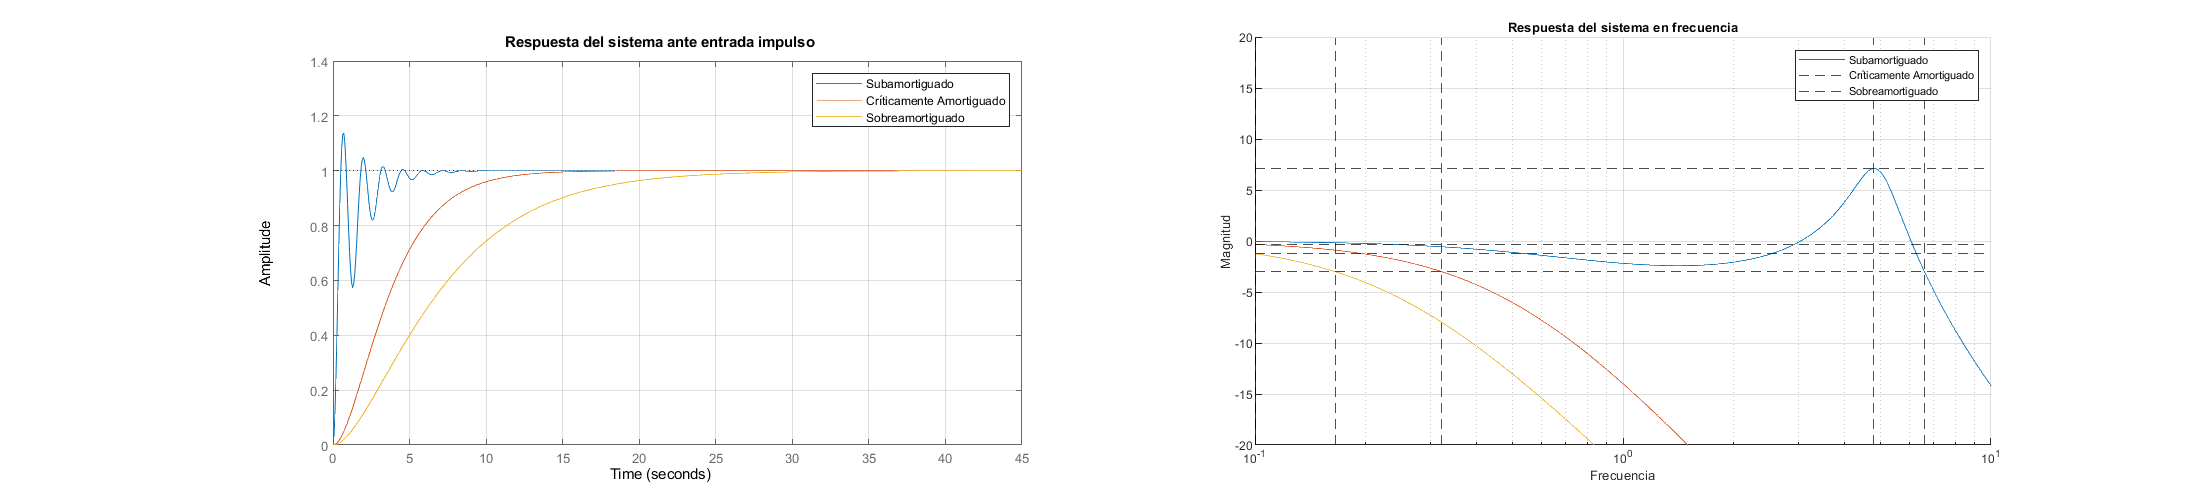

In [36]:
figure;

subplot(1, 2, 1)
step(subamortiguado_lazo_cerrado, criticamente_amortiguado_lazo_cerrado, sobreamortiguado_lazo_cerrado)
legend("Subamortiguado", "Críticamente Amortiguado", "Sobreamortiguado")
title("Respuesta del sistema ante entrada impulso")
ylim([0 1.4])
grid on

ax = subplot(1, 2, 2);
hold(ax, "on")
frecuencia = logspace(-1, 1, 1000);
for lazo_cerrado = [subamortiguado_lazo_cerrado, criticamente_amortiguado_lazo_cerrado, sobreamortiguado_lazo_cerrado]
    [magnitud, fase, frecuencia] = bode(lazo_cerrado, frecuencia);
    magnitud = 20 * log10(magnitud);
    
    [pico_de_resonancia, magnitud_indice_maximo] = max(magnitud);
    frecuencia_pico_de_resonancia = frecuencia(magnitud_indice_maximo);
    
    [magitud_ancho_de_banda, magitud_indice_ancho] = min(abs(magnitud+3));
    ancho_de_banda = frecuencia(magitud_indice_ancho);
    
    plot(frecuencia, reshape(magnitud, [1, length(frecuencia)]))
    
    yline(pico_de_resonancia, "--k")
    xline(frecuencia_pico_de_resonancia, "--k")
    xline(ancho_de_banda, "--k")
    set(gca, 'XScale', 'log')

end

set(gca, 'XScale', 'log')
xlabel("Frecuencia")
ylabel("Magnitud")
yline(-3, "--k")
ylim([-20 20])
legend("Subamortiguado", "Críticamente Amortiguado", "Sobreamortiguado")
title("Respuesta del sistema en frecuencia")
grid("on")

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_07"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_09"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>